In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from functions.stock import download_stock_data
from const.interval import Interval

In [2]:
#codigos_de_negociacao = ["BBAS3.SA", "PETR4.SA", "VALE3.SA"]

stock_data = download_stock_data("BBAS3.SA", Interval.DAY.value, 365)

[*********************100%***********************]  1 of 1 completed


In [3]:
df_bbas3 = stock_data

df_bbas3['Adj Close_next_day'] = stock_data['Adj Close'].shift(-1)

In [4]:
df_bbas3 = df_bbas3.drop(df_bbas3.index[-1])
df_bbas3.dropna

<bound method DataFrame.dropna of                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-11  35.299999  35.849998  35.060001  35.799999  33.039860  14542400   
2023-01-12  35.570000  35.869999  35.009998  35.570000  32.827587  10086600   
2023-01-13  35.500000  35.849998  34.950001  35.650002  32.901424  10043500   
2023-01-16  35.660000  36.119999  35.320000  35.610001  32.864506   9218900   
2023-01-17  35.790001  37.700001  35.540001  37.700001  34.793365  26060500   
...               ...        ...        ...        ...        ...       ...   
2024-01-03  54.680000  55.070000  54.500000  54.810001  54.810001   8148400   
2024-01-04  54.750000  54.900002  54.119999  54.230000  54.230000   8099900   
2024-01-05  54.180000  55.130001  54.000000  54.880001  54.880001   8227900   
2024-01-08  55.049999  55.480000  54.779999  55.349998  55.349998   9053800   
2024-01-09  55.090

In [5]:
display(df_bbas3)

,Open,High,Low,Close,Adj Close,Volume,Adj Close_next_day
Date,,,,,,,
2023-01-11,35.299999,35.849998,35.060001,35.799999,33.039860,14542400,32.827587
2023-01-12,35.570000,35.869999,35.009998,35.570000,32.827587,10086600,32.901424
2023-01-13,35.500000,35.849998,34.950001,35.650002,32.901424,10043500,32.864506
2023-01-16,35.660000,36.119999,35.320000,35.610001,32.864506,9218900,34.793365
2023-01-17,35.790001,37.700001,35.540001,37.700001,34.793365,26060500,35.291740
...,...,...,...,...,...,...,...
2024-01-03,54.680000,55.070000,54.500000,54.810001,54.810001,8148400,54.230000
2024-01-04,54.750000,54.900002,54.119999,54.230000,54.230000,8099900,54.880001
2024-01-05,54.180000,55.130001,54.000000,54.880001,54.880001,8227900,55.349998


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X = df_bbas3.iloc[:, 1:-1] # Todas as colunas, exceto a última e a priemira
y = df_bbas3.iloc[:, -1] # Última coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [9]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regression_model.predict(X_test)

In [11]:
# importando as funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# exibindo os resultados
print('Modelo Linear Regression\n')
print("RMSE:", rmse)
print("R²:", r2)

Modelo Linear Regression

RMSE: 0.7389683396031071
R²: 0.9835913567086096


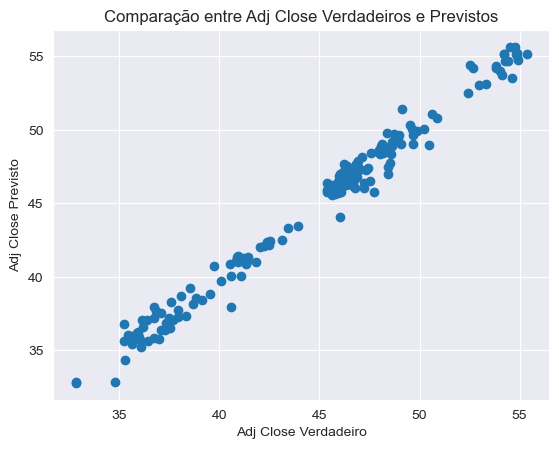

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Adj Close Verdadeiro")
plt.ylabel("Adj Close Previsto")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")
plt.show()

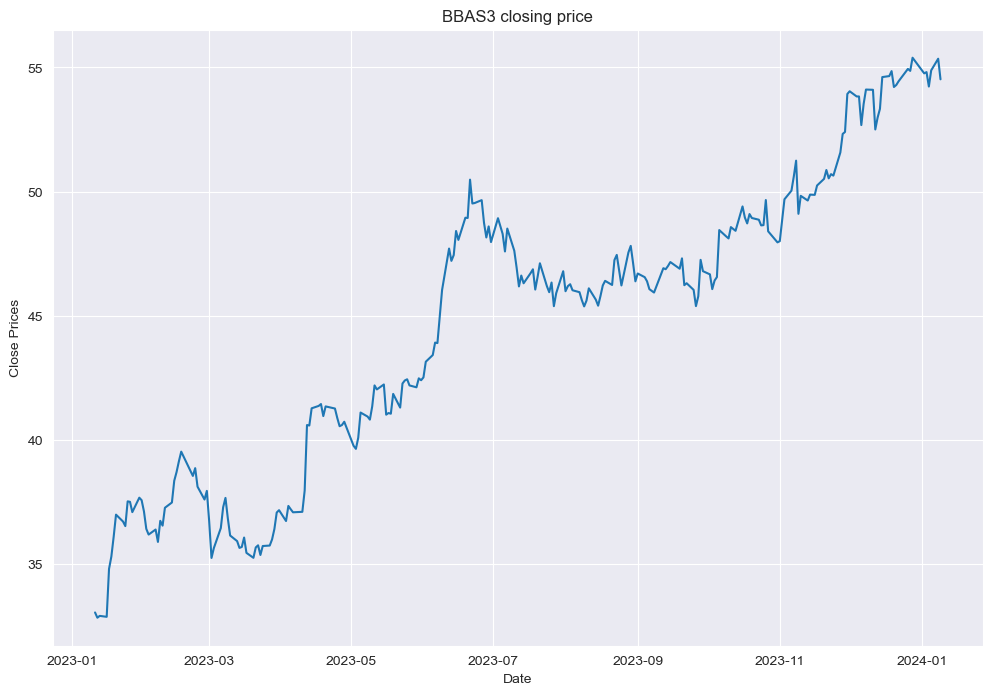

In [15]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_bbas3['Adj Close'])
plt.title('BBAS3 closing price')
plt.show()

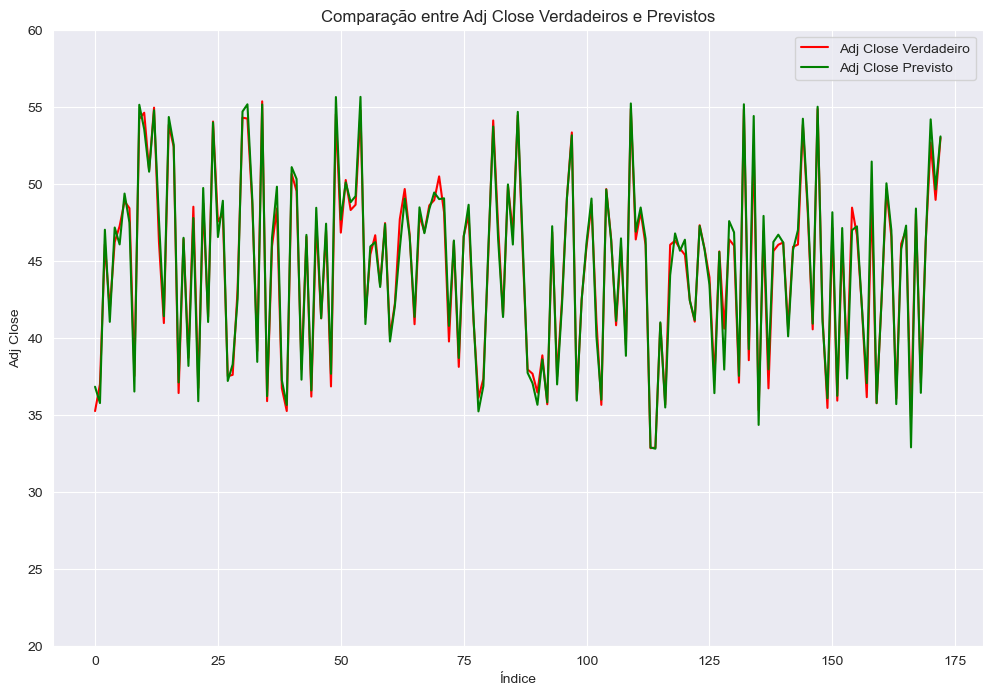

In [16]:
# Ajustar o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Plotar as linhas verde e vermelha
plt.plot(y_test.values, color='red', label='Adj Close Verdadeiro')
plt.plot(y_pred, color='green', label='Adj Close Previsto')

# Adicionar rótulos e título
plt.xlabel("Índice")
plt.ylabel("Adj Close")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")

# Adicionar legenda
plt.legend()

# Definir limites do eixo y para diminuir a escala
plt.ylim(20, 60)  # Ajuste os valores conforme necessário

# Exibir o gráfico
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [16]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(y_test, y_pred_test_2)

# calcular o desepenho usando RMSE
rmse_2 = (np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

In [17]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_2.mean())
print('R2 train:', r2_train_2)
print('R2 test:', r2_test_2)
print('RMSE:', rmse_2)

Modelo DecisionTreeRegression

CV:  0.995558499081695
R2 train: 1.0
R2 test: 0.9952091371192701
RMSE: 0.3779086949404724


In [17]:
# Defina o tamanho da janela deslizante
window_size = 30  # ajuste conforme necessário

# Lista para armazenar os resultados
rmse_list = []
r2_list = []

# Loop para deslizar a janela ao longo dos dados
for i in range(len(df_bbas3) - window_size + 1):
    # Crie a janela de dados
    window_data = df_bbas3.iloc[i:i + window_size, :]
    
    # Separe os dados em X e y
    X_window = window_data.iloc[:, 1:-1]
    y_window = window_data.iloc[:, -1]
    
    # Divida os dados em conjuntos de treino e teste
    X_train_window, X_test_window, y_train_window, y_test_window = train_test_split(
        X_window, y_window, test_size=0.7, random_state=42)
    
    # Inicialize e ajuste o modelo de regressão linear
    regression_model_window = LinearRegression()
    regression_model_window.fit(X_train_window, y_train_window)
    
    # Faça previsões
    y_pred_window = regression_model_window.predict(X_test_window)
    
    # Calcule as métricas de avaliação
    mse_window = mean_squared_error(y_test_window, y_pred_window)
    rmse_window = np.sqrt(mse_window)
    r2_window = r2_score(y_test_window, y_pred_window)
    
    # Armazene os resultados
    rmse_list.append(rmse_window)
    r2_list.append(r2_window)

# Exiba os resultados médios
print('Média do RMSE:', np.mean(rmse_list))
print('Média do R²:', np.mean(r2_list))

Média do RMSE: 1677.8535910758374
Média do R²: -26019016.502836738
